<a href="https://colab.research.google.com/github/jgomezpe/sgoal/blob/main/sgoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGoal: Stochastic Global Optimization Algorithms
This notebook shows some examples of using the sgoal python package available at the github of professor Jonatan Gomez https://github.com/jgomezpe/sgoal

## Preliminars

To run scripts in this notebook, you must install sgoal package from the github repository by running the following cell:

In [1]:
!pip install git+https://github.com/jgomezpe/sgoal/

  Cloning https://github.com/jgomezpe/sgoal/ to /tmp/pip-req-build-onekb0ph
  Running command git clone --filter=blob:none --quiet https://github.com/jgomezpe/sgoal/ /tmp/pip-req-build-onekb0ph
  Resolved https://github.com/jgomezpe/sgoal/ to commit 410678573df7aa237a045826ce411a94eab27355
  Preparing metadata (setup.py) ... done


## Introduction
Suppose we want to <b>minimize</b> function:
\begin{equation*}
  \begin{array}{crll}
    \text{f: } & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10\cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$ with $n=10$.

First, we write function $f$

In [ ]:
import math

def f( x ):
  s = 0.0
  for i in range(len(x)):
    s += x[i]*x[i] - 10.0*math.cos(2.0*math.pi*x[i])
  return 10.0*len(x) + s

Then, we define the optimization problem:

In [ ]:
from sgoal.real import RealSpace
D = 10 # Dimension
t = 'min' # Minimization problem (use 'max' for a maximization problem)
min = [-5.12 for i in range(D)] # Min component of the hypercube defining the solution space
max = [5.12 for i in range(D)] # Max component of the hypercube defining the solution space
space = RealSpace(min, max) # Solution space
PR = {'f':f, 'space':space, 'type':t} # Optimization problem

Finally, we use and run a SGoal. Here, we use Hill Climbing:

Best:  f(x)= 2.144933352995281 x= [0.021576527825608594, 0.03879192401787007, -0.03538139177357491, 0.007175071057402116, -0.023683684407783012, 0.011542536559664862, 0.032406022940499435, -0.018420625668168045, -0.01234809940469117, 1.0124281034317741]


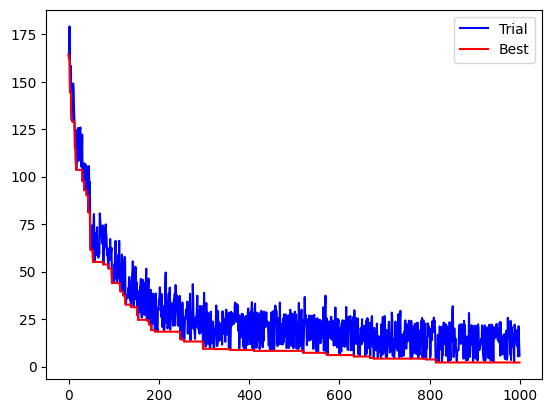

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.hc import RealHC # We use Hill Climbing for Real Spaces
MAXEVALS = 1000 # Maximum number of objective function evaluations
TRACE = True # We want to trace the algorithm
alg = RealHC(PR) # We use RealHC
results = alg.run(MAXEVALS, TRACE) # We run RealHC
x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = results['trace'] # Value of the i-th function evaluation
z = results['besttrace'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

## Optimizing Bit Array Functions
SGoal provides a set of functions, classes, and algorithms for optimizing functions defined on bitstring (bit arrays).

Suppose we want to <b>maximize</b> the bit array function:
\begin{equation*}
  \begin{array}{crll}
    \text{g: } & \{0,1\}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} x_i
      \\
  \end{array}
\end{equation*}
With $n=10$.

First, notice that $g=sum$ with $sum$ the sumation of the elements of a list (bit array). Then, we define the optimization problem and finally we use some bit array SGoal.

Best:  f(x)= 100 x= 1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


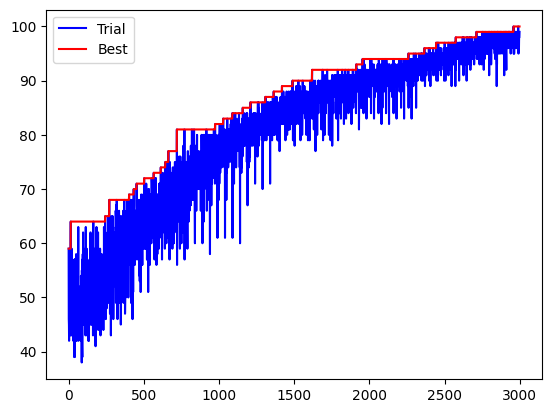

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.binary import BitArraySpace
from sgoal.binary import BitArrayProblem
from sgoal.hc import BitArrayHC
from sgoal.chavela import BitArrayCHAVELA
from sgoal.ga import BitArrayGGA
from sgoal.ga import BitArraySSGA
from sgoal.gabo import GABO
from sgoal.gabo import GABO2
from sgoal.hc import RMHC
from sgoal.ggsc1 import GGS1
from sgoal.ggsc1 import GGSC1

########## 1. DEFINE FUNCTION #########
# Since g = sum we do not need to define something
########## 2. DEFINE SPACE #########
D = 100 # Length of the bit array
t = 'max' # Maximization problem (use 'min' for a minimization problem)
opt = 100 # Optimum value for the function (useful for comparing SGoals, if available)
space = BitArraySpace(D) # Solution space
PR = {'f':sum, 'space':space, 'type':t, 'optimum': opt}  # Optimization problem
########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [BitArrayHC, RMHC, GGS1, GGSC1, GABO, GABO2, BitArrayGGA, BitArraySSGA, BitArrayCHAVELA]
K = 8 # SGoal to be tested (use a value between 0 and 8 to try other SGoals)
alg = ALG[K](PR)
MAXEVALS = 5000 # Maximum number of objective function evaluations
TRACE = True # We want to trace the algorithm
results = alg.run(MAXEVALS, TRACE)
x = results['x'] # Best solution
fx = results['f'] # Best function value
# Just for printing purposes
s = ''
for v in x:
  s += '1' if(v==1) else '0'
print('Best:', ' f(x)=', fx, 'x=', s)
# Since we set trace to True we can get some additional information
y = results['trace'] # Value of the i-th function evaluation
z = results['besttrace'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

### Testbed
SGoal provides implementation of the classical bit array functions, see The "GABO: Gene Analysis Base Optimization" algorithm as proposed by J. Gomez and E. Leon, "Gabo: Gene Analysis Bitstring Optimization," 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022,pp. 1-8, doi: 10.1109/CEC55065.2022.9870237. for details:

$MaxOnes\left(x\right)={\displaystyle \sum_{i=1}^{D}} x_i$

$Gd3\left(x\right)={\displaystyle \sum_{k=1}^{m}}g3\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{3k+1, 3k+2, 3k+3\right\}$ and $g3(x)$ is the Goldberg's deceptive order-$3$ block function.

$Gbd4\left(x\right)={\displaystyle \sum_{k=1}^{m}}bd\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{4k+1,\ldots, 4k+4\right\}$ and $bd(x)$ is the Goldberg's bounded deceptive order-$4$ block function.

$Rr1\left(x\right)={\displaystyle \sum_{k=1}^{m}}Rrb_{8}\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{8k+1,\ldots, 8k+8\right\}$ and $Rrb_{8}(x)$ is the Royal Road $8$-bits block function:
 \begin{equation*}
    Rrb_K\left(x\right) =
    \begin{cases}
        K & \text{if } x=111\ldots111\\
        0 & \text{otherwise}
    \end{cases}
\end{equation*}

$Mixed\left(x\right)={\displaystyle \sum_{k=1}^{m}}Mxb\left(x_{\left(S_k\right)}\right)$ with $S_k=\left\{20k+1,\ldots, 20k+20\right\}$ and $Mxb\left(x\right) = MaxOnes\left(x_{1}\ldots x_{5}\right) + g3\left(x_{6}x_{7}x_{8}\right) + bd\left(x_{9} \ldots x_{12}\right) + Rrb_{8}\left(x_{13}\ldots x_{20}\right)$.

We can optimize any of these functions by using function $BitArrayProblem$ from <i>sgoal.binary</i> as follows:

Best:  f(x)= 269 x= 111110000000111111111111011100001111111111111111111111111111111111111111111111111111111111111111111111111111111100010101


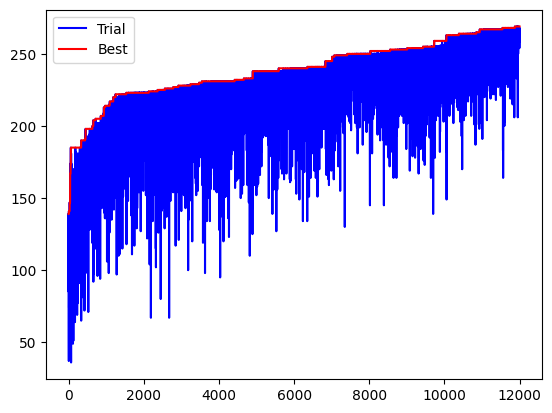

In [ ]:
from sgoal.binary import BitArrayProblem

D = 120 # Length of the bit array
name = ['MaxOnes','GD3','GBD4','RR1','RR2','Mixed']
F = 5 # Problem to solve
PR = BitArrayProblem(name[F], D) # Problem to solve

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [BitArrayHC, RMHC, GGS1, GGSC1, GABO, GABO2, BitArrayGGA, BitArraySSGA, BitArrayCHAVELA]
K = 8 # SGoal to be tested (use a value between 0 and 8 to try other SGoals)
alg = ALG[K](PR)
MAXEVALS = 100*D # Maximum number of objective function evaluations
TRACE = True # We want to trace the algorithm
results = alg.run(MAXEVALS, TRACE)
x = results['x'] # Best solution
fx = results['f'] # Best function value
# Just for printing purposes
s = ''
for v in x:
  s += '1' if(v==1) else '0'
print('Best:', ' f(x)=', fx, 'x=', s)
# Since we set trace to True we can get some additional information
y = results['trace'] # Value of the i-th function evaluation
z = results['besttrace'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

## Optimizing $\mathbb{R}^n$ Functions
SGoal provides a set of functions, classes, and algorithms for optimizing functions defined on $\mathbb{R}^n$.

Suppose we want to <b>minimize</b> function:
\begin{equation*}
  \begin{array}{crll}
    \text{f: } & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10\cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$ with $n=10$.

First, we write function $f$, then we define the space, and finally we define and use the SGoal algorithm:


Best:  f(x)= 0.16705376575416153 x= [0.008535268082406233, 0.002109785426679861, 0.008535268082406233, 0.008535268082406233, 0.008535268082406233, 0.008535268082406233, 0.008535268082406233, 0.015972879107271964, 0.008535268082406233, 0.008535268082406233]


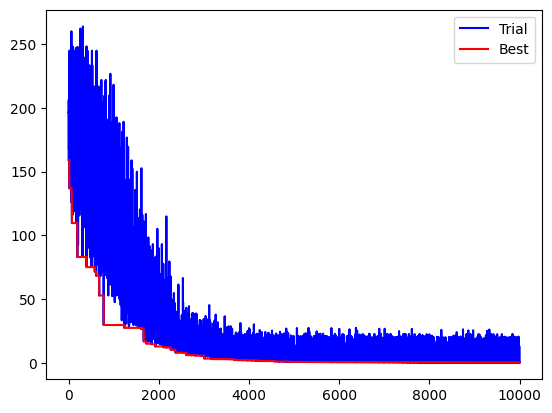

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.real import RealSpace
from sgoal.real import RealProblem
from sgoal.hc import RealHC
from sgoal.chavela import RealCHAVELA
from sgoal.ga import RealGGA
from sgoal.ga import RealSSGA
from sgoal.es import RealR1_5

import math

########## 1. DEFINE FUNCTION #########
def f( x ):
  s = 0.0
  for i in range(len(x)):
    s += x[i]*x[i] - 10.0*math.cos(2.0*math.pi*x[i])
  return 10.0*len(x) + s

########## 2. DEFINE SPACE #########
D = 10 # Dimension
t = 'min' # Minimization problem (use 'max' for a maximization problem)
min = [-5.12 for i in range(D)] # Min component of the hypercube defining the solution space
max = [5.12 for i in range(D)] # Max component of the hypercube defining the solution space
space = RealSpace(min, max) # Solution space
PR = {'f':f, 'space':space, 'type':t} # Optimization problem

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [RealHC, RealR1_5, RealGGA, RealSSGA, RealCHAVELA]
K = 4 # SGoal to be tested (use a value between 0 and 4 to try other SGoals)
alg = ALG[K](PR)
MAXEVALS = 10000 # Maximum number of objective function evaluations
TRACE = True # We want to trace the algorithm
results = alg.run(MAXEVALS, TRACE)
x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = results['trace'] # Value of the i-th function evaluation
z = results['besttrace'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

### Testbed
SGoal provides implementation of the following classical real functions  problems:

\begin{equation*}
  \begin{array}{crll}
    \text{Griewank:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} \frac{x_i^2}{4000} - \prod_{i=1}^{n}\cos\left(\frac{x_i}{\sqrt{i}}\right)
      \\
  \end{array}
\end{equation*}
For  $x \in [-600,600]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Rastrigin:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 10n-\sum_{i=1}^{n} x_i - 10cos(2 \pi x_i))
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Schwefel:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & 418.9829n-\sum_{i=1}^{n} x_i \sin(\sqrt{|x_i|})
      \\
  \end{array}
\end{equation*}
For  $x \in [-500,500]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Rosenbrock:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n-1} 100(x_{i+1} - x_i^2)^2 +(x_i-1)^2
      \\
  \end{array}
\end{equation*}
For  $x \in [-2.048,2.048]^{n}$.

\begin{equation*}
  \begin{array}{crll}
    \text{Sphere:} & \mathbb{R}^{n} & \longrightarrow & \mathbb{R} \\
      & (x) & \longmapsto & \sum_{i=1}^{n} x_i^2
      \\
  \end{array}
\end{equation*}
For  $x \in [-5.12,5.12]^{n}$.

We can optimize any of these functions by using function $RealProblem$ from <i>sgoal.real</i> as follows:

Best:  f(x)= 0.08944555565923906 x= [-0.006260931740560943, -0.006260931740560943, -0.00828641665376914, -0.006260931740560943, -0.006260931740560943, -0.006260931740560943, -0.00828641665376914, -0.006260931740560943, -0.006260931740560943, -0.006260931740560943]


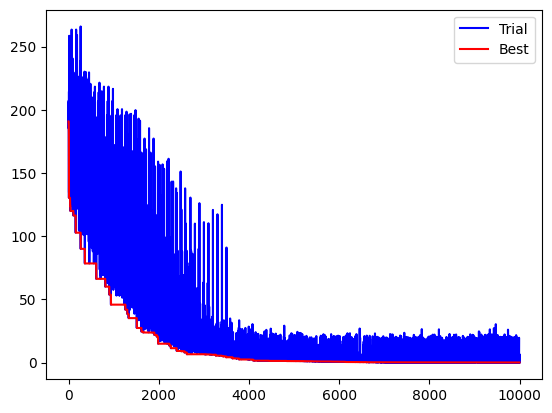

In [3]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

from sgoal.real import RealSpace
from sgoal.real import RealProblem
from sgoal.hc import RealHC
from sgoal.chavela import RealCHAVELA
from sgoal.ga import RealGGA
from sgoal.ga import RealSSGA
from sgoal.es import RealR1_5
from sgoal.real import RealProblem
import math

D = 10 # Dimension
name = ['Rastrigin', 'Schwefel', 'Rosenbrock', 'Griewank', 'Sphere']
TF = 0 # 0: Testing Rastrigin
PR = RealProblem(name[TF], D)

########## 3. RUN SGOAL #########
# Each one of the possible SGoals
ALG = [RealHC, RealR1_5, RealGGA, RealSSGA, RealCHAVELA]
K = 4 # SGoal to be tested (use a value between 0 and 4 to try other SGoals)
alg = ALG[K](PR)
MAXEVALS = 10000 # Maximum number of objective function evaluations
TRACE = True # We want to trace the algorithm
results = alg.run(MAXEVALS, TRACE)
x = results['x'] # Best solution
fx = results['f'] # Best function value
print('Best:', ' f(x)=', fx, 'x=', x)
# Since we set trace to True we can get some additional information
y = results['trace'] # Value of the i-th function evaluation
z = results['besttrace'] # Value of the best function evaluation up to the i-th evaluation
idx = [i for i in range(len(y))] # Evaluation
plt.plot(idx,y,label='Trial', color='blue')
plt.plot(idx,z, label='Best', color='red')
plt.legend()
plt.show()

##Experiments
SGoal provides a function for running several times an algorithm on the same function. In the following example we run $R$ times some SGoals on testbed bit array functions. Followig script can be used to obtain similar result to those reported by J. Gomez and E. Leon in "GABO: Gene Analysis Base Optimization" 2022 IEEE Congress on Evolutionary Computation (CEC), Padua, Italy, 2022, pp. 1-8, doi: 10.1109/CEC55065.2022.9870237 (https://dl.acm.org/doi/10.1109/CEC55065.2022.9870237).

================= 120 =================
*************** Mixed ***************
SGOAL   SR      MAX       EVALS
GABO 0.27 271.6+/-8.7 11087.9+/-1879.17
RMHC 0.0 264.23+/-6.53 12000.0+/-0.0
GS1 0.0 208.93+/-2.91 12000.0+/-0.0
GSC1 0.0 209.07+/-1.87 12000.0+/-0.0
GGA 0.0 250.07+/-10.16 12000.0+/-0.0
SSGA 0.0 239.43+/-10.6 12000.0+/-0.0
CHAVELA 0.6 276.1+/-9.76 10886.93+/-1336.21


<Axes: >

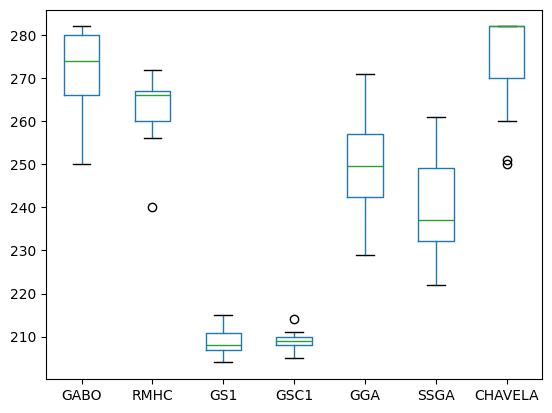

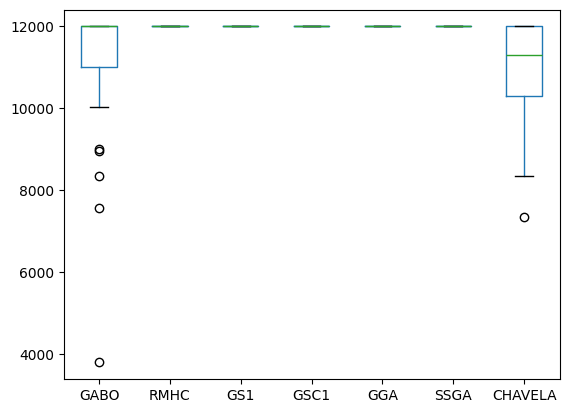

In [2]:
import sgoal
from sgoal.binary import BitArrayProblem
from sgoal.chavela import BitArrayCHAVELA
from sgoal.ga import BitArrayGGA
from sgoal.ga import BitArraySSGA
from sgoal.ggsc1 import GS1
from sgoal.ggsc1 import GSC1
from sgoal.hc import RMHC
from sgoal.gabo import GABO
from sgoal.core import experiment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# We format numbers to two decimal positions for presentation purposes
def round(x): return (int(100*x+0.5))/100

# We compute statistical information (average and standard deviation)
def stats(a):
  n = len(a)
  avg = sum(a)/n
  std = 0
  for y in a:
    std += (y-avg)**2
  std = (std/(n-1))**0.5
  return avg, std

# Paper reported values
def report(sgoal, fx, evals, sr):
  avg, std = stats(fx)
  avg, std = round(avg), round(std)
  avg_evals, std_evals = stats(evals)
  avg_evals, std_evals = round(avg_evals), round(std_evals)
  print(sgoal, ' ', round(sr), ' ', avg, '+/-', std, ' ', avg_evals, '+/-', std_evals, sep='')
  return sr, avg, std, avg_evals, std_evals

#Main program
# Search algorithm
sgoal = [GABO, RMHC, GS1, GSC1, BitArrayGGA, BitArraySSGA, BitArrayCHAVELA]
sgoal_name = ['GABO', 'RMHC', 'GS1', 'GSC1', 'GGA', 'SSGA', 'CHAVELA']
name = ['MaxOnes','GD3','GBD4','RR1','Mixed']
F = 4 # Testing the Mixed function. Change the number accordingly
R = 30 # Number of experiments
D = 120 # Problem dimension (BitArray Length)
EVALS = 100*D # Maximum number of fitness evaluations

problem = BitArrayProblem(name[F], D)

df = pd.DataFrame()
dfiter = pd.DataFrame()
print('=================', D, '=================')
print('***************', name[F], '***************')
print('SGOAL   SR      MAX       EVALS')
for i in range(len(sgoal)):
  f, evals, sr = experiment(sgoal[i], problem, EVALS, R)
  report(sgoal_name[i], f, evals, sr)
  df[sgoal_name[i]] = f
  dfiter[sgoal_name[i]] = evals

myFig = plt.figure();
df.boxplot(grid=False)
myFig = plt.figure();
dfiter.boxplot(grid=False)